In [20]:
import os

os.add_dll_directory("C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.3\\bin\\")
os.add_dll_directory(r"C:\Users\Ilya\OneDrive - Peter the Great St. Petersburg Polytechnical University\Рабочий стол\cudnn-windows-x86_64-8.7.0.84_cuda11-archive\bin")
os.add_dll_directory(r"C:\Users\Ilya\OneDrive - Peter the Great St. Petersburg Polytechnical University\Рабочий стол\zlib\dll_x64")
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import matplotlib.pyplot as plt
# для вывода графики
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import animation
%matplotlib inline
from skimage.morphology import binary_closing, binary_erosion
from skimage.color import rgb2gray, label2rgb# операции над матрицами
import numpy as np

# загрузка и сохранение изображений
from imageio import imread, imsave

# работа над изображениями
from skimage.color import rgb2gray, rgba2rgb
from skimage.feature import canny
from skimage.filters import sobel, gaussian, threshold_local, try_all_threshold, threshold_otsu,threshold_mean
from skimage.data import page
from skimage.morphology import binary_opening, binary_closing
from skimage.measure import regionprops
# импортируем функцию label под другим именем, чтобы не терять её, если появляется переменная label
from skimage.measure import label as sk_measure_label
from skimage.segmentation import watershed
import cv2

from scipy import ndimage as ndi

# вывод
from IPython.display import HTML

# работа с таблицами
import pandas as pd

# для работы с путями к файлам
import os

import imageio.v2 as imageio
import src.photo_preprocessing as pp

from keras.models import Sequential, load_model

from keras.layers import (Conv2D, MaxPooling2D, Flatten, Reshape, GlobalMaxPooling2D,
                          Activation, Dense, BatchNormalization)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from importlib import reload
pp = reload(pp)

In [21]:
train = []
train_target = []
#zeros_mask = np.zeros((208,112,1))

In [3]:
# set _train data
first = 1
data = 1
for i in range(1,11):

        easy_to_segment = imageio.imread(os.path.join("images_obj", f"{i}.jpeg"))
        easy_to_segment = cv2.resize(easy_to_segment, (112,208))
        mask = pp.get_mask_object(easy_to_segment,largest=True, ind_of_polygon=0)[0]
        
        #v = [easy_to_segment] + [pp.get_random_photo(easy_to_segment,mask,left=i * 5,right=i *5 + 1) for i in range(5)]pl.
        
        v = [easy_to_segment for i in range(5)]
        train += v
        mask = mask * (i)
    
        train_target += [mask.reshape(mask.shape[0],mask.shape[1],1) for i in range(len(v))]
        print(i)


1
2
3
4
5
6
7
8
9
10


[[[148 135 116]
  [149 136 117]
  [152 137 120]
  ...
  [165 152 143]
  [163 150 142]
  [164 151 143]]

 [[149 136 117]
  [150 137 118]
  [151 137 120]
  ...
  [164 151 143]
  [164 151 143]
  [164 151 143]]

 [[150 137 118]
  [151 138 119]
  [150 135 118]
  ...
  [165 152 143]
  [164 151 143]
  [164 151 143]]

 ...

 [[ 93  80  64]
  [ 92  79  63]
  [ 94  81  65]
  ...
  [113 104  96]
  [116 105  99]
  [115 104 102]]

 [[ 93  80  64]
  [ 93  80  64]
  [ 94  81  65]
  ...
  [114 105  97]
  [114 103  97]
  [116 105 103]]

 [[ 93  80  64]
  [ 92  79  63]
  [ 92  79  63]
  ...
  [114 105  97]
  [114 103  97]
  [116 105 103]]]


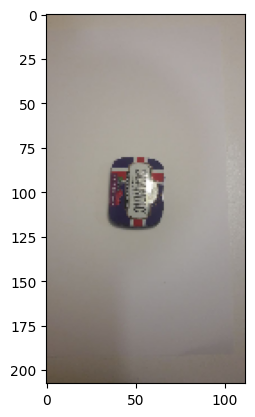

In [4]:
print(train[0])
plt.imshow(train[0])

[10 10 10 ... 10 10 10]


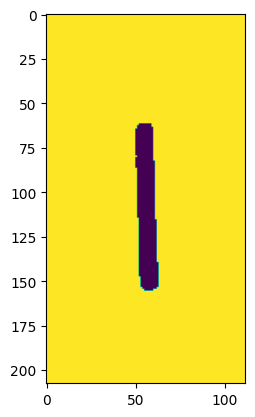

In [5]:
plt.imshow(mask * 2)
mask = mask
print(mask[mask>0])

In [6]:
image_8bit = np.uint8(mask * 255)
contours, _ = cv.findContours(image_8bit, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
v = cv.drawContours(easy_to_segment,[box],0,(255,255,255),1)
plt.show()

In [7]:
box

array([[  0,   0],
       [111,   0],
       [111, 207],
       [  0, 207]], dtype=int64)

In [8]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [9]:
img = rotate_image(v,rect[2])

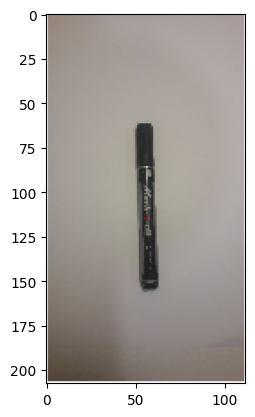

In [10]:
plt.imshow(v)

In [11]:
v[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255

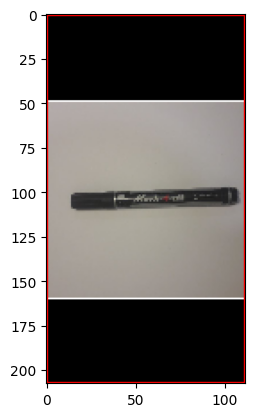

In [12]:
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Create a Rectangle patch
rect_ = patches.Polygon(box, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect_)

plt.show()


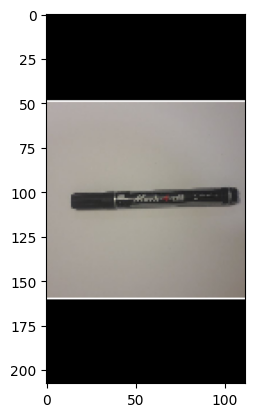

In [13]:
plt.imshow(img,cmap="gray")

In [14]:
mask = mask.reshape(208,112,1)

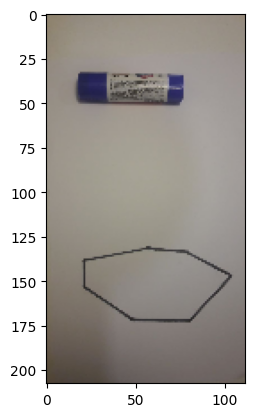

In [15]:
easy_to_segment = imageio.imread(os.path.join("train_data", "7.jpeg"))
#easy_to_segment = cv2.resize(easy_to_segment, (480,880))
easy_to_segment = cv2.resize(easy_to_segment, (112,208))
plt.imshow(easy_to_segment)

In [18]:
#plt.imshow(pp.get_mask_object(easy_to_segment,largest=True|, ind_of_plygon=1))
mask = pp.get_mask_object(easy_to_segment,largest=True, ind_of_plygon=1)[0]
#mask = np.zeros(shape=(3, 2))
#>>> a
plt.imshow(pp.get_random_photo(easy_to_segment,mask,left=254,right=255))

#mask = np.zeros_like(mask)

TypeError: get_mask_object() got an unexpected keyword argument 'ind_of_plygon'

In [19]:

#plt.imshow(output)

In [162]:
train_true =  [easy_to_segment for i in range(30)]
#train_true =  [easy_to_segment for i in range(6)]

In [163]:
train_target_true = [mask.reshape(mask.shape[0],mask.shape[1],1) for i in range(len(train_true))]

In [164]:
train += train_true
train_target += train_target_true

In [103]:
train = np.array(train)
train_target = np.array(train_target)

In [104]:
train_target.shape,train.shape

((185, 208, 112, 1), (185, 208, 112, 3))

In [105]:
def make_fashion_model():
    imodel = Sequential()
    imodel.add(Reshape((1080, 608, 3), input_shape=(1080, 608, 3)))
    imodel.add(Conv2D(4, kernel_size=(3, 3), strides=(1, 1),
                         activation='relu', padding='same'))
    imodel.add(BatchNormalization())
    imodel.add(MaxPooling2D())
    imodel.add(Conv2D(8, kernel_size=(3, 3), strides=(1, 1),
                         activation='relu', padding='same'))
    imodel.add(BatchNormalization())
    imodel.add(MaxPooling2D())
    imodel.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1),
                         activation='relu', padding='same'))
    imodel.add(BatchNormalization())
    imodel.add(MaxPooling2D())
    imodel.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                         activation='relu', padding='same'))
    imodel.add(BatchNormalization())
    imodel.add(MaxPooling2D())
    imodel.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1),
                         activation='relu', padding='same'))
    imodel.add(BatchNormalization())
    imodel.add(MaxPooling2D())
    imodel.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1),
                         activation='relu', padding='same'))
    imodel.add(BatchNormalization())
    imodel.add(Flatten())

    iclf = Sequential()
    iclf.add(imodel)
    #iclf.add(Conv2D(128, kernel_size=(3, 3),activation="softmax", padding="same"))

    iclf.compile(optimizer='adam', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return iclf

In [435]:
from keras.preprocessing.image import ImageDataGenerator
SEED = 100

fit_params = {
    "batch_size": 10,
    "epochs": 200,
}

image_data_generator = ImageDataGenerator(
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    rotation_range = 70,
    zoom_range = 0.1
).flow(train,batch_size=fit_params["batch_size"], seed = SEED)

mask_data_generator = ImageDataGenerator(
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    rotation_range =70,
    zoom_range = 0.1
).flow(train_target, batch_size=fit_params["batch_size"], seed = SEED)

def my_image_mask_generator(image_data_generator, mask_data_generator):
    train_generator = zip(image_data_generator, mask_data_generator)
    for (img, mask) in train_generator:
        yield (img, mask)

In [436]:
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downs/ampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128,256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256,128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model

In [31]:
model

NameError: name 'model' is not defined

In [437]:
me_generator = my_image_mask_generator(image_data_generator,mask_data_generator)

In [592]:
#model =  get_model(train_target.shape[1:-1],11)
#model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

#callbacks = [
#    keras.callbacks.ModelCheckpoint("oxford_segmenta76tion5.h5", save_best_only=True)
#]

# Train the model, doing validation at the end of each epoch.
epochs = 20
model.fit(me_generator,steps_per_epoch = 50, epochs=epochs)

Epoch 1/20
50/50 [==============================] - 4s 72ms/step - loss: 0.0443
Epoch 2/20
50/50 [==============================] - 4s 72ms/step - loss: 0.0452
Epoch 3/20
50/50 [==============================] - 4s 72ms/step - loss: 0.0415
Epoch 4/20
50/50 [==============================] - 4s 72ms/step - loss: 0.0506
Epoch 5/20
50/50 [==============================] - 4s 73ms/step - loss: 0.0450
Epoch 6/20
50/50 [==============================] - 4s 72ms/step - loss: 0.0461
Epoch 7/20
50/50 [==============================] - 4s 72ms/step - loss: 0.0491
Epoch 8/20
50/50 [==============================] - 4s 74ms/step - loss: 0.0453
Epoch 9/20
50/50 [==============================] - 4s 76ms/step - loss: 0.0473
Epoch 10/20
50/50 [==============================] - 4s 78ms/step - loss: 0.0461
Epoch 11/20
50/50 [==============================] - 4s 82ms/step - loss: 0.0457
Epoch 12/20
50/50 [==============================] - 4s 82ms/step - loss: 0.0456
Epoch 13/20
50/50 [==================

In [24]:
model = load_model("test_model.h5")
path = os.path.join("train_data", "14.jpeg")
easy_to_segment = plt.imread(path)
easy_to_segment = cv2.resize(easy_to_segment, (112,208))

In [25]:
v = model.predict(easy_to_segment.reshape(1,208,112,3))

1/1 [==============================] - 6s 6s/step


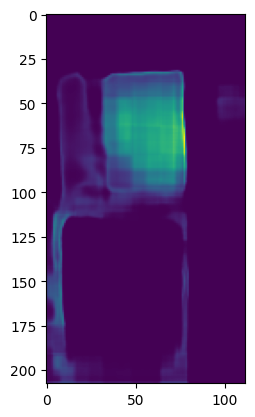

In [32]:
a = v >0.1
#cv.resize(v,(1080,600))
plt.imshow(v[0,:,:,5])

In [114]:
mask = np.argmax(v, axis=-1)

In [37]:
v[:,:,:,1]

array([[[5.4236064e-03, 5.1550224e-04, 6.0968054e-04, ...,
         8.8386907e-05, 1.3947467e-04, 2.9170775e-04],
        [1.2877902e-04, 4.5491823e-05, 5.6824778e-05, ...,
         2.1893549e-05, 1.0013083e-05, 5.3579704e-05],
        [9.7402175e-05, 3.3779077e-05, 6.0272767e-05, ...,
         1.8461489e-05, 1.1258341e-05, 5.1748601e-05],
        ...,
        [7.2190014e-05, 3.9851944e-05, 5.2372448e-05, ...,
         3.0184910e-05, 1.9769728e-05, 5.7754492e-05],
        [1.2378972e-04, 3.7984180e-05, 5.8493733e-05, ...,
         3.6241399e-05, 1.5174824e-05, 8.8155844e-05],
        [1.1737556e-03, 2.3114981e-04, 2.1251013e-04, ...,
         5.0196930e-05, 6.3277206e-05, 1.3350898e-03]]], dtype=float32)

In [251]:
l = v[0,:,:,0] < 0.4
l = l.reshape(208,112,1)
easy_to_segment_1 = easy_to_segment * l

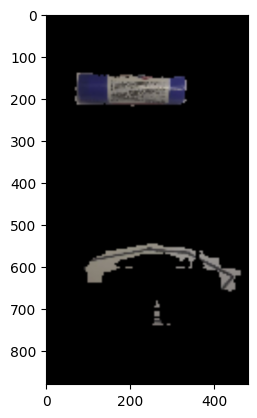

In [255]:
#plt.imshow(easy_to_segment_1 )
plt.imshow(cv.resize(easy_to_segment_1,(480,880)))

In [19]:
[i for i in me_generator]

[]

In [26]:
b = []
for i in range(10):
    b.append(me_generator.__next__())

In [625]:
model.save('test_model.h5')

In [626]:
from keras.models import load_model

In [1069]:
c = load_model("test_model.h5")

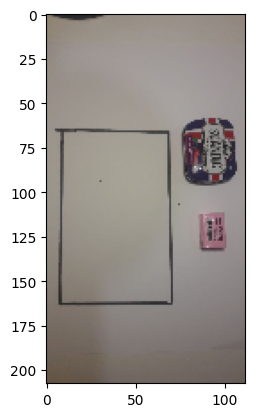

In [1119]:
easy_to_segment = imageio.imread(os.path.join("train_data", "2.jpeg"))
#easy_to_segment = cv2.resize(easy_to_segment, (480,880))
easy_to_segment = cv2.resize(easy_to_segment, (112,208))
plt.imshow(easy_to_segment)

In [1120]:
v = c.predict(easy_to_segment.reshape(1,208,112,3))

1/1 [==============================] - 0s 29ms/step


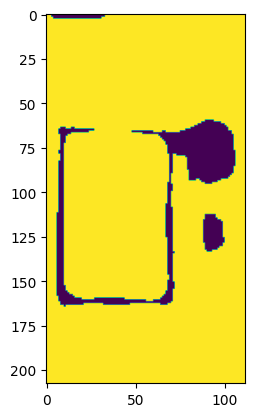

In [1121]:
plt.imshow(v[0,:,:,0] > 0.1)

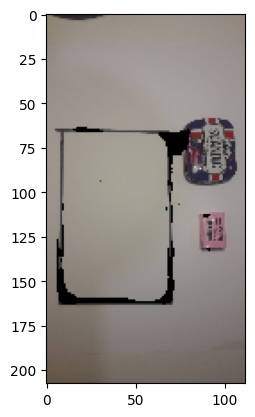

In [1122]:
v[0,:,:,5].shape
l = v[0,:,:,7].reshape(208,112,1) < 0.2
plt.imshow(l * easy_to_segment)

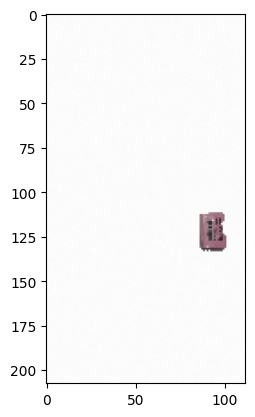

In [1152]:
mask = pp.get_mask_object(easy_to_segment,largest=True, ind_of_plygon=4)[0]
#mask = np.zeros(shape=(3, 2))
#>>> a
plt.imshow(pp.get_random_photo(easy_to_segment,mask,left=250,right=255))

In [1159]:
def get_masks(photo, model):
    LOW_P = 0.3
    MIN_P = 0.2
    i = 0
    n = pp.get_mask_object(photo,largest=True, ind_of_plygon=0)[1]
    print(n)
    print("n = ",n)
    p = []
    masks = {}
    for j in range(1,len(n)):
        print("j = ",j)
        if n[j] > 100:
            mask = pp.get_mask_object(photo,largest=True, ind_of_plygon=j)[0]
            for i in range(1,11):
                k = mask * v[0,:,:,i].reshape(208,112)
                k = k > LOW_P
                p_var = sum(k[k != False])/len(mask[mask != False])
                print(p_var)
                if p_var > MIN_P:
                    p.append(i)
                    masks[i] = mask
                    break
            else:
                masks[0] = mask
                p.append(0)

    return p,masks

#k = mask * v[0,:,:,8].reshape(208,112)
#k = k > 0.2

In [1160]:
#sum(k[k != False])/len(mask[mask != False])
get_masks(easy_to_segment,model)

[94, 15661, 1022, 6224, 295]
n =  [94, 15661, 1022, 6224, 295]
j =  1
0.004022731626332929
0.0
0.0002554115318306622
0.0
0.0
0.0
0.003767320094502267
0.0
0.0043419960411212564
0.0
j =  2
0.8767123287671232
j =  3
0.0019280205655526992
0.0
0.0009640102827763496
0.0
0.0
0.0
0.017673521850899744
0.0
0.062339331619537273
0.01365681233933162
j =  4
0.0
0.0
0.09830508474576272
0.0
0.0
0.0
0.0
0.0
0.05084745762711865
0.23728813559322035


([0, 1, 0, 10],
 {0: array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  1: array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  10: array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],


In [1161]:
plt.imshow(masks[10])

NameError: name 'masks' is not defined

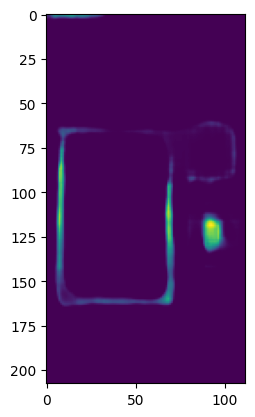

In [1145]:
plt.imshow(v[0,:,:,8])

In [799]:
mask[mask != False]

array([ True,  True,  True, ...,  True,  True,  True])

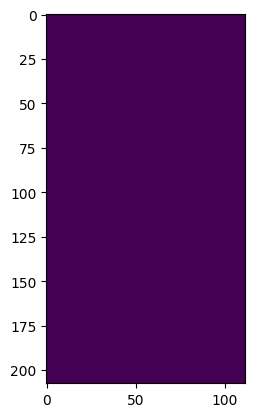

In [1126]:
plt.imshow(mask)

In [801]:
sum(mask[mask == True])

2600